**PLOT THE INITIAL PARTICLE DISTRIBUTION IN 3D**

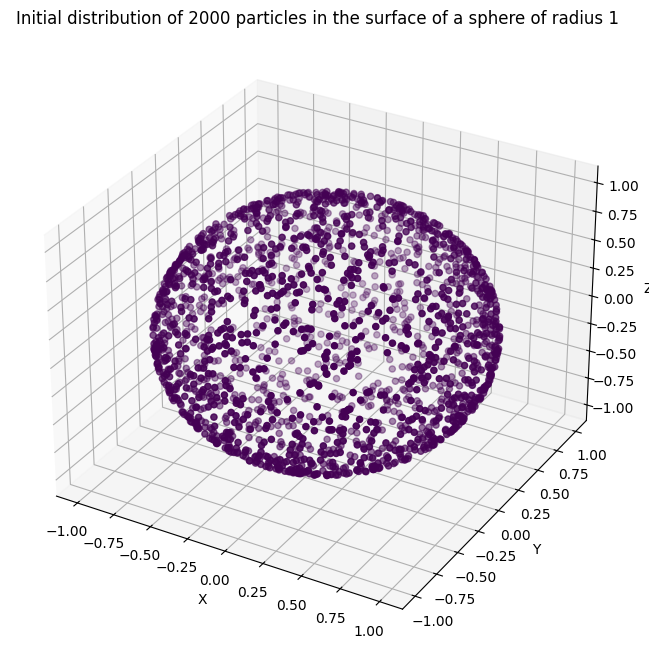

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos desde el archivo
filename = "/content/initial_conditions.txt"  # Cambia al nombre real de tu archivo
data = np.loadtxt(filename)

# Extraer las columnas del archivo
masses = data[:, 0]       # Masa de las partículas
x_coords = data[:, 1]     # Coordenada x
y_coords = data[:, 2]     # Coordenada y
z_coords = data[:, 3]     # Coordenada z
vx = data[:, 4]           # Velocidad en x
vy = data[:, 5]           # Velocidad en y
vz = data[:, 6]           # Velocidad en z

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Representar las partículas en 3D
scatter = ax.scatter(x_coords, y_coords, z_coords, c=masses, cmap='viridis', s=20)

# Configuración de etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Initial distribution of 2000 particles in the surface of a sphere of radius 1')



# Mostrar el gráfico
plt.show()


**MAKE A GIF WITH YOUR output.data**

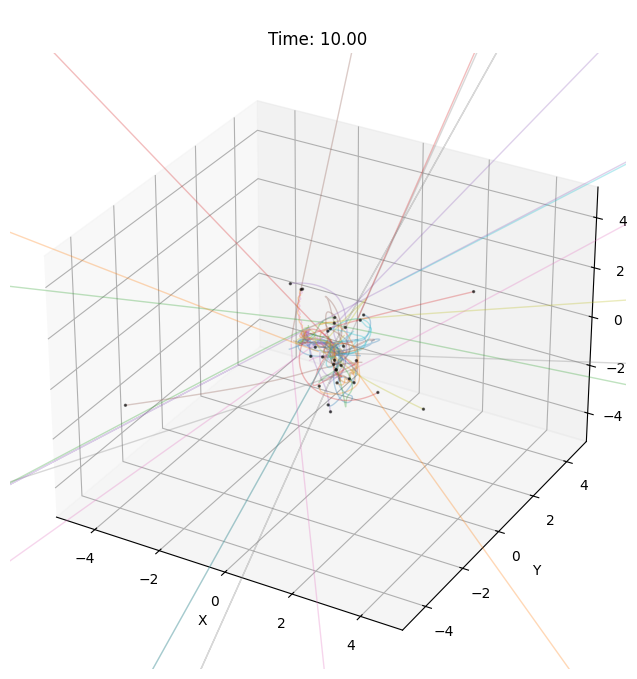

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

# Cargar datos desde el archivo
filename = "/content/output.dat"  # Cambia al nombre real de tu archivo
data = np.loadtxt(filename)

# Extraer las columnas
time = data[:, 0]      # Columna 1: Instante de tiempo
particle_id = data[:, 1].astype(int)  # Columna 2: ID de la partícula (como enteros)
x_coords = data[:, 2]  # Columna 3: Coordenada x
y_coords = data[:, 3]  # Columna 4: Coordenada y
z_coords = data[:, 4]  # Columna 5: Coordenada z

# Identificar los valores únicos de tiempo y partículas
unique_times = np.unique(time)
unique_particles = np.unique(particle_id)

# Crear un diccionario para almacenar las trayectorias de cada partícula
trajectories = {pid: ([], [], []) for pid in unique_particles}

# Crear figura para el gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Determinar los límites fijos para los ejes
x_min, x_max = np.min(x_coords), np.max(x_coords)
y_min, y_max = np.min(y_coords), np.max(y_coords)
z_min, z_max = np.min(z_coords), np.max(z_coords)
'''
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)
'''

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)


ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Crear una lista para las líneas de las trayectorias
lines = {pid: ax.plot([], [], [], alpha=0.3, linewidth=1)[0] for pid in unique_particles}

# Crear la referencia inicial para las partículas (scatter)
scatter = ax.scatter([], [], [], c='black', s=2)

# Función para actualizar la animación
def update(frame):
    current_time = unique_times[frame]

    # Filtrar partículas del instante actual
    indices = np.where(time == current_time)
    x = x_coords[indices]
    y = y_coords[indices]
    z = z_coords[indices]
    ids = particle_id[indices]

    # Actualizar posiciones de las partículas
    scatter._offsets3d = (x, y, z)

    # Actualizar las trayectorias (estelas)
    for i, pid in enumerate(ids):
        # Añadir la posición actual a la trayectoria de la partícula
        trajectories[pid][0].append(x[i])
        trajectories[pid][1].append(y[i])
        trajectories[pid][2].append(z[i])

        # Actualizar la línea correspondiente
        lines[pid].set_data(trajectories[pid][0], trajectories[pid][1])
        lines[pid].set_3d_properties(trajectories[pid][2])

    # Actualizar título
    ax.set_title(f"\nTime: {current_time:.2f}")

# Crear la animación
num_frames = len(unique_times)
ani = FuncAnimation(fig, update, frames=num_frames, interval=200)

# Guardar la animación como GIF
ani.save("particles_motion_with_trails.gif", writer=PillowWriter(fps=10))

plt.show()

